In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from colorspacious import cspace_converter

# pick on of the test csv table
tests_m = pd.read_csv(r"C:\Users\mad17\Desktop\EGI_SPIKES\spikes_notebooks\tests_m_xgb_f.csv")
# pick up the upper border of mann-whitney score
mw_max = 3
tests_m = tests_m[tests_m['mann-whitney'] < mw_max]
# create a table with the mann-whitney score and the color
mann_whitney = pd.DataFrame({'mann-whitney': np.arange(0, mw_max, 1)})
mann_whitney['color'] = sns.color_palette("hot", len(mann_whitney))
# separate the table by threshold
tests_m_5 = tests_m[tests_m.threshold == 0.5]
tests_m_6 = tests_m[tests_m.threshold == 0.6]
tests_m_7 = tests_m[tests_m.threshold == 0.7]
tests_m_8 = tests_m[tests_m.threshold == 0.8]
tests_m_85 = tests_m[tests_m.threshold == 0.85]
tests_m_9 = tests_m[tests_m.threshold == 0.9]
tests_m_95 = tests_m[tests_m.threshold == 0.95]
# choose the threshold
table = tests_m_9

The lowest one

In [2]:

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[1].set_xticks(np.arange(0, 10, 1))
    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
    axs[0].set_title('Mann-Whitney score', fontsize=10)
        
    for ax in axs[:1]:
        ax.set_axis_off()
 
    axs[-1].set_yticks([])
    # Save colormap list for later.
    cmaps[category] = cmap_list


tests_m.sort_values(by='mann-whitney', inplace=True)

import seaborn as sns
gb1 = table.groupby('sensor1')['mann-whitney'].apply(list).reset_index(name='mann-whitney')
gb2 = table.groupby('sensor2')['mann-whitney'].apply(list).reset_index(name='mann-whitney')
sensor1 = table.groupby('sensor1')['mann-whitney'].apply(list).reset_index(name='mann-whitney')
sensor2 = table.groupby('sensor2')['mann-whitney'].apply(list).reset_index(name='mann-whitney')

sensor2.rename(columns={'sensor2': 'sensor1'}, inplace=True)
# combine sensor1 and sensor2
sensor1 = pd.concat([sensor1, sensor2], axis=0)

# leave the lowest mann-whitney value for each sensor1
sensor1['mann-whitney'] = sensor1['mann-whitney'].apply(lambda x: np.min(x))
sensor1.sort_values(by='mann-whitney', inplace=True, ascending=True)
# leave only row with lowest mann-whitney value
sensor1.drop_duplicates(subset='sensor1', keep='first', inplace=True)

# create new column with color for values taken from mann_whitney df according to mann-whitney value
sensor1['color'] = sensor1['mann-whitney'].apply(lambda x: mann_whitney['color'][x])
sensor1.sort_values(by='mann-whitney', inplace=True, ascending=True)
sensor1.reset_index(drop=True, inplace=True)


# delete row with 'E55' sensor
sensor1 = sensor1[sensor1.sensor1 != 'E55'] 

# sensor1 split colors in 3 columns r,g,b
sensor1['r'] = sensor1['color'].apply(lambda x: x[0])
sensor1['g'] = sensor1['color'].apply(lambda x: x[1])
sensor1['b'] = sensor1['color'].apply(lambda x: x[2])
sensor1.drop(columns=['color'], inplace=True)

sensor1.reset_index(drop=True, inplace=True)
import mne
from mne.viz import plot_alignment, set_3d_view
import pyvista as pv
raw1 = mne.io.read_raw_fif(r"C:\Users\mad17\Desktop\VE\MFF\AO0.fif")
sensors_origin = raw1.info['ch_names']
# remove mann-whitney column from sensor1
sensor1.drop(columns='mann-whitney', inplace=True)
# sensor1 to array
sensor1 = sensor1.values

#create an array from sensors origin with all electrode number and r,g,b values
sensors = []
for i in range(len(sensors_origin)):
    sensors.append([sensors_origin[i], 1, 1, 0.799265])



# # sensor arraty to df with columns: sensor, color
sensors = pd.DataFrame(sensors, columns=['sensor', 'r', 'g', 'b'])
sensors
# # # if sensor1 in sensors, change sensor r,g,b to sensor1 r,g,b
for i in range(len(sensor1)):
    for j in range(len(sensors)):
        if sensor1[i][0] == sensors['sensor'][j]:
            sensors['r'][j] = sensor1[i][1]
            sensors['g'][j] = sensor1[i][2]
            sensors['b'][j] = sensor1[i][3]
sensors = sensors[sensors.sensor != 'E55']            
# sensors
sensors = sensors.values[:, 1:]


data_path = mne.datasets.sample.data_path()
subjects_dir = data_path / "subjects"
meg_path = data_path / "MEG" / "sample"
trans = mne.read_trans(meg_path / "sample_audvis_raw-trans.fif")
raw = mne.io.read_raw_fif(meg_path / "sample_audvis_raw.fif")

# Plot electrode locations on scalp
fig = plot_alignment(
    raw1.info,
    trans,
    subject="sample",
    dig=False,
    eeg=["original"],
    meg = ['helmet', 'sensors', 'ref'],
    sensor_colors=sensors,
    surfaces=dict(brain=0.9, outer_skull=0.6, outer_skin=0.3),


    coord_frame="mri",
    subjects_dir=subjects_dir,
    
   
)

# Set viewing angle
set_3d_view(figure=fig, azimuth=135, elevation=80)




#
            






Opening raw data file C:\Users\mad17\Desktop\VE\MFF\AO0.fif...


C:\Users\mad17\AppData\Local\Temp\ipykernel_4760\4220045867.py:64: RuntimeWarning: This filename (C:\Users\mad17\Desktop\VE\MFF\AO0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw1 = mne.io.read_raw_fif(r"C:\Users\mad17\Desktop\VE\MFF\AO0.fif")


    Range : 0 ... 4668898 =      0.000 ... 18675.592 secs
Ready.
Opening raw data file C:\Users\mad17\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


C:\Users\mad17\AppData\Local\Temp\ipykernel_4760\4220045867.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensors['r'][j] = sensor1[i][1]
C:\Users\mad17\AppData\Local\Temp\ipykernel_4760\4220045867.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensors['g'][j] = sensor1[i][2]
C:\Users\mad17\AppData\Local\Temp\ipykernel_4760\4220045867.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensors['b'][j] = sensor1[i][3]
C:\U

Using pyvistaqt 3d backend.

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Using outer_skin.surf for head surface.
Channel types::	eeg: 47


*Appearance coefficent

In [3]:
mann_whitney = pd.DataFrame({'coeficient': np.arange(0, ((mw_max+1)*10), 1)})
mann_whitney['color'] = sns.color_palette("hot", len(mann_whitney))
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[1].set_xticks(np.arange(0, 10, 1))
    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
    axs[0].set_title('Mann-Whitney score', fontsize=10)
        
    for ax in axs[:1]:
        ax.set_axis_off()
 
    axs[-1].set_yticks([])
 
    cmaps[category] = cmap_list


tests_m.sort_values(by='mann-whitney', inplace=True)

import seaborn as sns
gb1 = table.groupby('sensor1')['mann-whitney'].apply(list).reset_index(name='mann-whitney')
gb2 = table.groupby('sensor2')['mann-whitney'].apply(list).reset_index(name='mann-whitney')
sensor1 = table.groupby('sensor1')['mann-whitney'].apply(list).reset_index(name='mann-whitney')
sensor2 = table.groupby('sensor2')['mann-whitney'].apply(list).reset_index(name='mann-whitney')

sensor2.rename(columns={'sensor2': 'sensor1'}, inplace=True)

sensor1 = pd.concat([sensor1, sensor2], axis=0)

sensor1['count'] = sensor1['mann-whitney'].apply(lambda x: len(x))

sensor1['mann-whitney'] = sensor1['mann-whitney'].apply(lambda x: np.min(x))
sensor1.sort_values(by='mann-whitney', inplace=True, ascending=True)
# add 1 to every mann-whitney value
sensor1['mann-whitney'] = sensor1['mann-whitney'].apply(lambda x: x+1)

sensor1.drop_duplicates(subset='sensor1', keep='first', inplace=True)
# counts value = 1/value
sensor1['counts'] = sensor1['count'].apply(lambda x: 1/x)
# column coeficient = mann-whitney value * counts value
sensor1['coeficient'] = sensor1['mann-whitney'] * sensor1['counts']
# sort by coeficient
sensor1.sort_values(by='coeficient', inplace=True, ascending=True)
sensor1

# coeficient * 100
sensor1['coeficient'] = sensor1['coeficient'].apply(lambda x: x*10)
# round coeficient
sensor1['coeficient'] = sensor1['coeficient'].apply(lambda x: round(x))

sensor1['coeficient'] = sensor1['coeficient'].apply(lambda x: float(x))
# # create new column with color for values taken from mann_whitney df according to mann-whitney value
sensor1['color'] = sensor1['coeficient'].apply(lambda x: mann_whitney['color'][x])
sensor1.sort_values(by='coeficient', inplace=True, ascending=True)
sensor1.reset_index(drop=True, inplace=True)


# # delete row with 'E55' sensor
sensor1 = sensor1[sensor1.sensor1 != 'E55'] 

# # sensor1 split colors in 3 columns r,g,b
sensor1['r'] = sensor1['color'].apply(lambda x: x[0])
sensor1['g'] = sensor1['color'].apply(lambda x: x[1])
sensor1['b'] = sensor1['color'].apply(lambda x: x[2])
sensor1.drop(columns=['color'], inplace=True)

sensor1.reset_index(drop=True, inplace=True)
import mne
from mne.viz import plot_alignment, set_3d_view
import pyvista as pv
raw1 = mne.io.read_raw_fif(r"C:\Users\mad17\Desktop\VE\MFF\AO0.fif")
sensors_origin = raw1.info['ch_names']
# # remove mann-whitney,count,coefficent columns from sensor1
sensor1.drop(columns=['mann-whitney', 'count', 'counts', 'coeficient'], inplace=True)



sensor1 = sensor1.values

# #create an array from sensors origin with all electrode number and E61 r,g,b values
sensors = []
for i in range(len(sensors_origin)):
    sensors.append([sensors_origin[i], 1, 1, 0.799265])



# # # sensor arraty to df with columns: sensor, color
sensors = pd.DataFrame(sensors, columns=['sensor', 'r', 'g', 'b'])
# sensors
# # # # if sensor1 in sensors, change sensor r,g,b to sensor1 r,g,b
for i in range(len(sensor1)):
    for j in range(len(sensors)):
        if sensor1[i][0] == sensors['sensor'][j]:
            sensors['r'][j] = sensor1[i][1]
            sensors['g'][j] = sensor1[i][2]
            sensors['b'][j] = sensor1[i][3]
sensors = sensors[sensors.sensor != 'E55']            
# sensors
sensors = sensors.values[:, 1:]


data_path = mne.datasets.sample.data_path()
subjects_dir = data_path / "subjects"
meg_path = data_path / "MEG" / "sample"
trans = mne.read_trans(meg_path / "sample_audvis_raw-trans.fif")
raw = mne.io.read_raw_fif(meg_path / "sample_audvis_raw.fif")

# Plot electrode locations on scalp
fig = plot_alignment(
    raw1.info,
    trans,
    subject="sample",
    dig=False,
    eeg=["original"],
    meg = ['helmet', 'sensors', 'ref'],
    sensor_colors=sensors,
    surfaces=dict(brain=0.9, outer_skull=0.6, outer_skin=0.3),


    coord_frame="mri",
    subjects_dir=subjects_dir,
    
   
)

# Set viewing angle
set_3d_view(figure=fig, azimuth=135, elevation=80)




# #
            






Opening raw data file C:\Users\mad17\Desktop\VE\MFF\AO0.fif...


C:\Users\mad17\AppData\Local\Temp\ipykernel_14656\151369234.py:82: RuntimeWarning: This filename (C:\Users\mad17\Desktop\VE\MFF\AO0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw1 = mne.io.read_raw_fif(r"C:\Users\mad17\Desktop\VE\MFF\AO0.fif")


    Range : 0 ... 4668898 =      0.000 ... 18675.592 secs
Ready.
Opening raw data file C:\Users\mad17\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


C:\Users\mad17\AppData\Local\Temp\ipykernel_14656\151369234.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensors['r'][j] = sensor1[i][1]
C:\Users\mad17\AppData\Local\Temp\ipykernel_14656\151369234.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensors['g'][j] = sensor1[i][2]
C:\Users\mad17\AppData\Local\Temp\ipykernel_14656\151369234.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensors['b'][j] = sensor1[i][3]
C

Using pyvistaqt 3d backend.

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Using outer_skin.surf for head surface.
Channel types::	eeg: 47


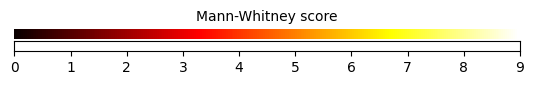

In [96]:
plot_color_gradients(cmap_list = ['hot'], category='mann-whitney')